In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import umap
import glob
#import numpy
import joblib

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error
# from sklearn.neural_network import MLPRegressor

#HIDDEN_LAYER_SIZES = (64,64)

In [3]:
folder = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/features/diff_singer_16k_feats_NEW'
#folder = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/features/diffsinger_window_filter'

In [4]:
def make_df_from_feature_files(folder, 
                               name = 'feats_',
                               sample = False,
                               sample_frac = 1.0,
                               cut_feat = False,
                               start = 50,
                               end = 50):

    files = glob.glob(f"{folder}/{name}*.csv")

    dfs = []
    for f in files:
        df=pd.read_csv(f)
        df = df.rename(columns={"Unnamed: 0": "chunkidx"})
        # df['filename'] = f.split(name)[1][:-10]
        # df['filepart'] = f[-9:-4]
        # df['fileindex'] = f.split("_")[-2]
        if cut_feat:
            df = df[start:-end] # removing 50 rows to account to applio's padding 
        dfs.append(df)

    df_full = pd.concat(dfs).reset_index(drop=True)

    if sample:
        df_full = df_full.sample(frac=sample_frac, 
                                 replace=True, 
                                 random_state=1)

    df_features = df_full[[c for c in df_full.columns if c in [str(n) for n in range(768)]]]

    return df_features

In [5]:
df_features = make_df_from_feature_files(folder, 
                                        sample = False)

In [6]:
df_features.shape

(120779, 768)

In [ ]:
#df_features.to_csv('df_features_labelled_full_wavs_features.csv')

In [7]:
X = df_features.values

# Create the mappings

In [8]:
reducer_3d = umap.UMAP(n_neighbors=100, 
                   min_dist = 0.2, # !!
                   random_state=42, 
                   n_components=3)

In [9]:
embedding_3d = reducer_3d.fit_transform(X)
embedding_3d.shape

(120779, 3)

In [15]:
umap_save = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/umap'

In [ ]:
#joblib.dump(reducer_3d, f'{umap_save}/umap_n100_dist0p2_3D.sav')
#loaded_umap = joblib.load('umap_2D.sav')

['/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/umap/umap_n100_dist0p2_3D.sav']

In [10]:
folder_vowels = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/features/Ha_maria'
vowels = ['A', 'E', 'I', 'O', 'U']

In [11]:
#folder_vowels = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/assets/features/Ha_maria/A'
embs = []
for v in vowels:
    df_feats = make_df_from_feature_files(f'{folder_vowels}/{v}', 
                                                    sample = False,
                                                    cut_feat = True,
                                                    start = 50,
                                                    end = -100)
    emb = reducer_3d.transform(df_feats.values)
    embs.append(emb)

# Plot embedding 

In [12]:
def make_plot_data_3d(embedding):
    df = pd.DataFrame(embedding)
    df=df.reset_index()
    df.columns = ['idx','x','y','z']
    df['size']=0.25

    return df

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
dfembed3 = make_plot_data_3d(embedding_3d)

(4.0, 12.0)

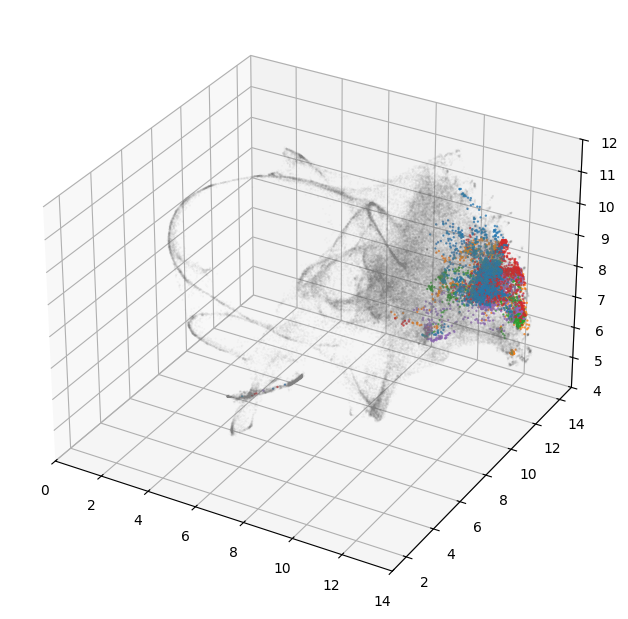

In [17]:
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

sc = ax.scatter(dfembed3['x'], 
                dfembed3['y'], 
                dfembed3['z'], 
                s=0.05, 
                alpha=0.075,
                color = 'grey')

for emb in embs:
    df_emb = make_plot_data_3d(emb)
    sc = ax.scatter(df_emb['x'], 
                    df_emb['y'], 
                    df_emb['z'], 
                    s=0.5, 
                    alpha=0.7)

ax.set_xlim([0,14])    
ax.set_ylim([1,15])
ax.set_zlim([4,12])

# ax.set_xlim([-1,15])
# ax.set_ylim([-1,15])
# ax.set_zlim([-5,5])